In [24]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

In [25]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.3.crossattention.masked_bias', 'decoder.transformer.h.3.crossattention.bias', 'decoder.transformer.h.4.attn.masked_bias', 'decoder.transformer.h.0.attn.bias', 'decoder.transformer.h.8.crossattention.masked_bias', 'decoder.transformer.h.6.attn.masked_bias', 'decoder.transformer.h.6.attn.bias', 'decoder.transformer.h.4.attn.bias', 'decoder.transformer.h.3.attn.bias', 'decoder.transformer.h.10.attn.masked_bias', 'decoder.transformer.h.11.crossattention.bias', 'decoder.transformer.h.11.attn.masked_bias', 'decoder.transformer.h.0.crossattention.masked_bias', 'decoder.transformer.h.9.crossattention.masked_bias', 'decoder.transformer.h.5.attn.bias', 'decoder.transformer.h.5.crossattention.bias', 'decoder.transformer.h.2.attn.bias', 'decoder.transformer.h.9.attn.masked_bias', 'decoder.transformer.h.8.attn.bias', 'decoder.transformer.h.1

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [26]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

In [27]:
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

In [28]:
path_img = '/kaggle/input/flowers-recognition/flowers/sunflower/1008566138_6927679c8a.jpg'

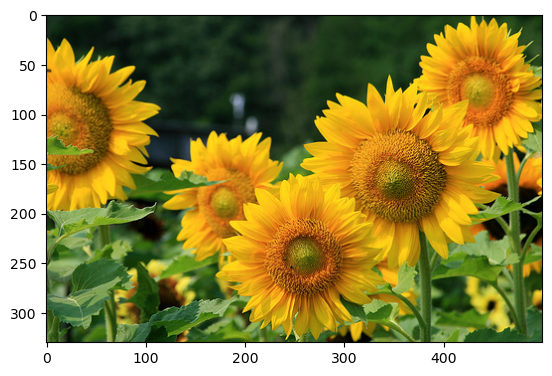

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as img
  
# reading the image
testImage = img.imread(path_img)
  
# displaying the image
plt.imshow(testImage)

In [31]:
predict_step([path_img]) 

['a pile of yellow flowers in a green field']